In [1]:
#Description: This program predicts the price of intel stock for a specific day using ML algorithms
#import lib
import time
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df = pd.read_csv('INTC.csv')
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/17/1980,0.325521,0.330729,0.325521,0.325521,0.199557,10924800,0
1,3/18/1980,0.325521,0.328125,0.322917,0.322917,0.197961,17068800,1
2,3/19/1980,0.330729,0.335938,0.330729,0.330729,0.202750,18508800,2
3,3/20/1980,0.330729,0.334635,0.329427,0.329427,0.201952,11174400,3
4,3/21/1980,0.322917,0.322917,0.317708,0.317708,0.194767,12172800,4
...,...,...,...,...,...,...,...,...
10326,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,10326
10327,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,10327
10328,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,10328
10329,3/4/2021,59.830002,60.240002,57.910000,58.330002,58.330002,40044900,10329


In [2]:
#Show the last row of data
actual_price = df.tail(1)
#Show the data
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume,index
10330,3/5/2021,59.259998,61.18,58.509998,60.740002,60.740002,39501700,10330


In [3]:
#Get all of the data except the last row
df = df.head(len(df)-1)
#show
df

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,3/17/1980,0.325521,0.330729,0.325521,0.325521,0.199557,10924800,0
1,3/18/1980,0.325521,0.328125,0.322917,0.322917,0.197961,17068800,1
2,3/19/1980,0.330729,0.335938,0.330729,0.330729,0.202750,18508800,2
3,3/20/1980,0.330729,0.334635,0.329427,0.329427,0.201952,11174400,3
4,3/21/1980,0.322917,0.322917,0.317708,0.317708,0.194767,12172800,4
...,...,...,...,...,...,...,...,...
10325,2/26/2021,60.889999,61.689999,59.680000,60.779999,60.779999,38210400,10325
10326,3/1/2021,61.720001,63.080002,61.650002,62.880001,62.880001,28495400,10326
10327,3/2/2021,62.799999,63.139999,61.110001,61.240002,61.240002,23298800,10327
10328,3/3/2021,60.639999,61.520000,59.700001,59.900002,59.900002,28705200,10328


In [4]:
# Create empty list 
days = list()
adj_close_prices = list()

In [5]:
#Get only the date and the adjusted close prices
df_days = df.loc[:,'index']
#show
df_days

df_adj_close = df.loc[:,'Adj Close']
#show
df_adj_close

0         0.199557
1         0.197961
2         0.202750
3         0.201952
4         0.194767
           ...    
10325    60.779999
10326    62.880001
10327    61.240002
10328    59.900002
10329    58.330002
Name: Adj Close, Length: 10330, dtype: float64

In [6]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(day)])
# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [7]:
days

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138]

In [8]:
adj_close_prices

[0.19955699999999998,
 0.197961,
 0.20275,
 0.201952,
 0.194767,
 0.190777,
 0.191575,
 0.189978,
 0.183592,
 0.190777,
 0.197163,
 0.197961,
 0.19955699999999998,
 0.19556600000000002,
 0.190777,
 0.191575,
 0.187584,
 0.18678599999999998,
 0.18678599999999998,
 0.188382,
 0.18598699999999999,
 0.178803,
 0.17561,
 0.178005,
 0.17640799999999998,
 0.184391,
 0.19556600000000002,
 0.196364,
 0.193171,
 0.191575,
 0.193171,
 0.19556600000000002,
 0.196364,
 0.19955699999999998,
 0.201952,
 0.201154,
 0.201154,
 0.198759,
 0.201154,
 0.200355,
 0.204346,
 0.20754,
 0.20913600000000002,
 0.21153000000000002,
 0.212329,
 0.209934,
 0.205144,
 0.20275,
 0.209934,
 0.20913600000000002,
 0.213925,
 0.213925,
 0.21711799999999998,
 0.217916,
 0.212329,
 0.215522,
 0.215522,
 0.213925,
 0.212329,
 0.214723,
 0.21711799999999998,
 0.213925,
 0.213925,
 0.213925,
 0.213127,
 0.21153000000000002,
 0.20754,
 0.20833800000000002,
 0.20833800000000002,
 0.20833800000000002,
 0.210732,
 0.210732,
 0.2

In [23]:
rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma=0.7)


In [24]:
x = time.perf_counter()
rbf_svr.fit(days,adj_close_prices)
print(time.perf_counter()-x)

56.75836880000003


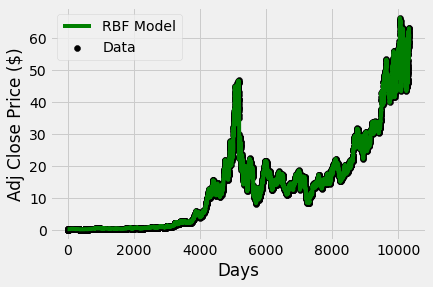

In [11]:
plt.scatter(days, adj_close_prices,color="black", label="Data")
plt.plot(days, rbf_svr.predict(days), color = "green", label = "RBF Model")
#plt.plot(days, poly_svr.predict(days), color = "orange", label = "Polynomial Model")
#plt.plot(days, lin_svr.predict(days), color = "blue", label = "Linear Model")
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [22]:
print(actual_price)

print(rbf_svr.predict([[10329]]))
df.tail(1)
print(rbf_svr.predict([[10330]]))

           Date       Open   High        Low      Close  Adj Close    Volume  \
10330  3/5/2021  59.259998  61.18  58.509998  60.740002  60.740002  39501700   

       index  
10330  10330  
[58.23001396]
[29.88967579]
